<a href="https://colab.research.google.com/github/andrespr2/Python/blob/master/exp_fit_cov19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
import pandas as pd

## Sources 
* https://medium.com/@tomaspueyo/coronavirus-act-today-or-people-will-die-f4d3d9cd99ca

* https://www.infobae.com/sociedad/2020/03/19/confirmaron-31-nuevos-casos-de-coronavirus-en-la-argentina-y-el-total-de-contagiados-asciende-a-128/

## Disclaimer

* No soy médico ni tengo ninguna especialidad en infectología. Sólo soy un tipo común haciendo un análisis bastante básico de cifras oficiales.

* El análisis no tiene en cuenta cosas importantes, como por ejemplo la cantidad de tests que se pueden realizar en el país. De mejorar en ese aspecto, parecería que los casos aumentan (creo que esto es lo que pasa en la última medición) cuando en realidad es que estamos testeando mejor.

In [0]:
data = np.array([1,1,2,8,9,12,17,19,21,31,34,45,56,65,78,97,128, 158])
dates = pd.date_range(start='2020-03-03', periods=len(data))

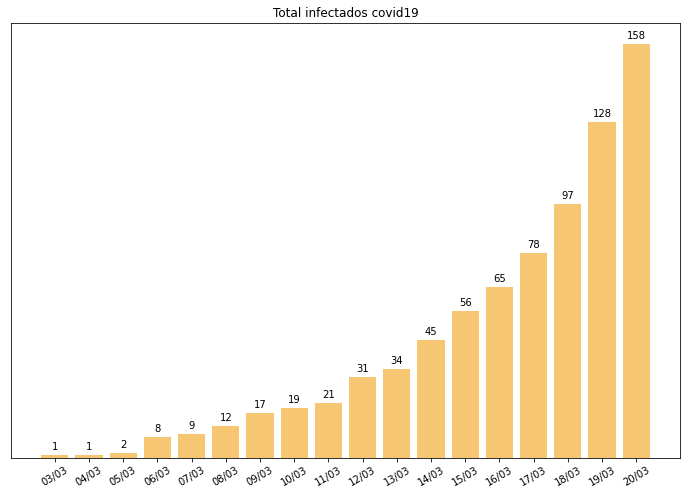

In [0]:
plt.figure(figsize=(12, 8))
xs = np.arange(1, len(data)+1)
plt.bar(xs, data, color='#f6c672');
plt.title('Total infectados covid19')
[plt.text(x, y+2, f'{int(y)}', horizontalalignment='center', color='black') for x, y in zip(xs, data)]
plt.yticks([])
plt.xticks(xs, dates.strftime('%d/%m'), rotation=30);

$y = a \cdot x^k + b$

In [0]:
ys = data
xs = range(1, len(ys) + 1)

def exp(x, a, k, b):
    return a * np.exp(x * k) + b

params, covariance = optimize.curve_fit(exp, xs, ys)

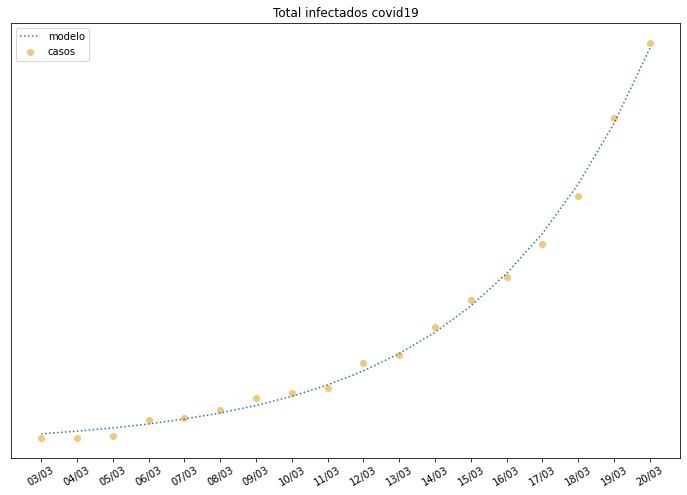

In [0]:
a, k, b = params
pred_x = range(1, len(ys)+1)
pred_y = [exp(x, a, k, b) for x in pred_x]
plt.figure(figsize=(12, 8))
plt.title('Total infectados covid19')

plt.plot(pred_x, pred_y, linestyle='dotted', label='modelo');
plt.scatter(xs, ys, color='#f6c672', label='casos');
plt.xticks(xs, dates.strftime('%d/%m'), rotation=30);
plt.yticks([])
plt.legend();

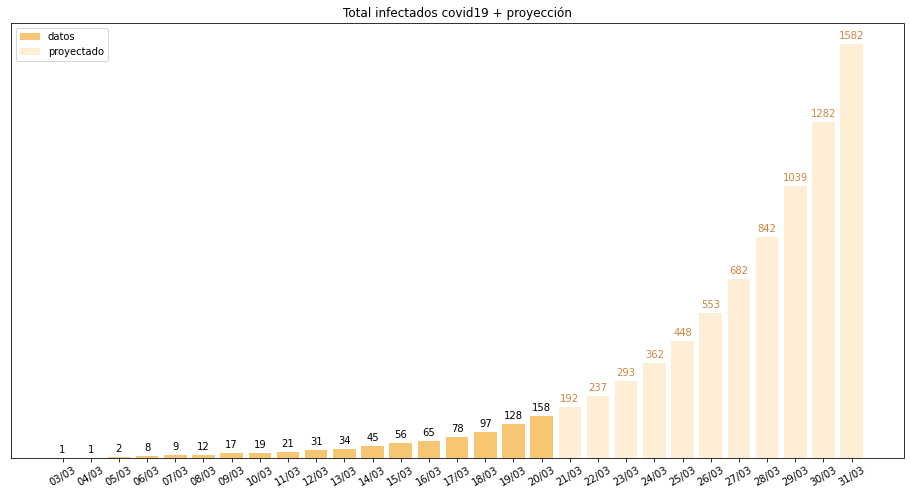

In [0]:
plt.figure(figsize=(16, 8))
xs = np.arange(1, len(data)+1)
xs_p = np.arange(len(data)+1, len(data) + 12)
ys_p = [exp(x, a, k, b) for x in xs_p]
plt.bar(xs, data, color='#f6c672', label='datos');
plt.bar(xs_p, ys_p, color='#f6c672', alpha=0.3, label='proyectado');
plt.title('Total infectados covid19 + proyección')
dates = pd.date_range(start='2020-03-03', periods=len(data) + 13)
xticks = np.arange(1, len(data)+12)
[plt.text(x, y+20, f'{int(y)}', horizontalalignment='center', color='black') for y, x in zip(data, xs)]
[plt.text(x, y+20, f'{int(y)}', horizontalalignment='center', color='peru') for y, x in zip(ys_p, xs_p)]
plt.yticks([])
plt.xticks(xticks, dates.strftime('%d/%m'), rotation=30);
plt.legend();

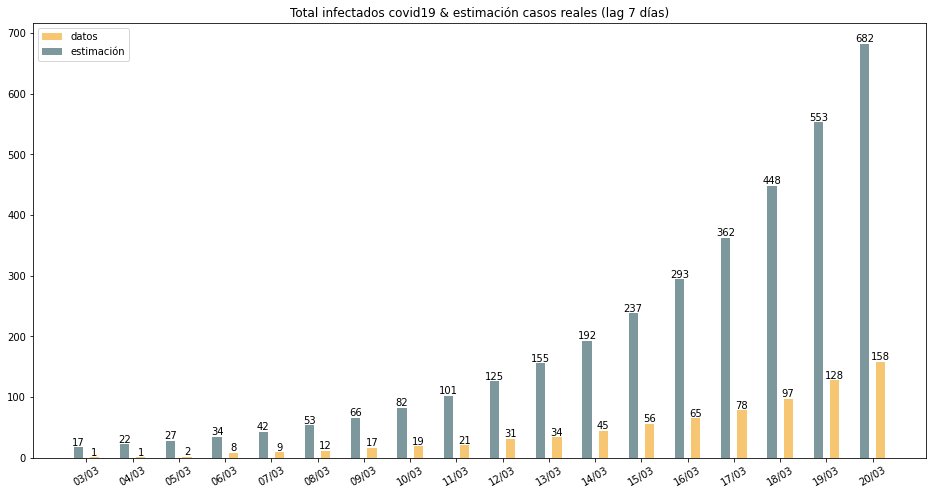

In [0]:
plt.figure(figsize=(16, 8))
xs = np.arange(1, len(data)+1)
lag = 7
offset = .175
ys_p = np.array([exp(x, a, k, b) for x in xs + lag])
plt.bar(xs+offset, data, width=0.2, color='#f6c672', label='datos');
plt.bar(xs-offset, ys_p, width=0.2, color='#7d989c', label='estimación');
plt.title('Total infectados covid19 & estimación casos reales (lag 7 días)')
dates = pd.date_range(start='2020-03-03', periods=len(data))
[plt.text(x+offset, y+3, f'{int(y)}', horizontalalignment='center', color='black') for x, y in zip(xs, data)]
[plt.text(x-offset, y+3, f'{int(y)}', horizontalalignment='center', color='black') for x, y in zip(xs, ys_p)]
xticks = np.arange(1, len(data)+1)
plt.legend()
plt.xticks(xticks, dates.strftime('%d/%m'), rotation=30);